### Iowa Alcohol Consumption
**based on the amount bought, determine if it is bought for a party or for individual consumption.
Bying alcohol for party means economy is doing good
buying for individual consumption might mean increased stress**
The dataset found in [here]("https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy/data") contains the liquor sales from local stores in Iowa, with details including the number of packs bought, the date, and the cost of the transaction

In [5]:
import pandas as pd
from sodapy import Socrata
import re

Set the limit to 100,000 rows

In [68]:
client = Socrata("data.iowa.gov", None)

results = client.get("m3tr-qhgy", limit=1000000)
results_df = pd.DataFrame.from_records(results)

Convert the type of column sale_bottles from string to an int for analysis

In [69]:
results_df = results_df.astype({'sale_bottles': 'int'})
pd.set_option("display.max_rows", None, "display.max_columns", None)

Find daily sales of: sale_bottles and date (any type of alcohol)

In [70]:
category_and_sale_bottles = results_df[['date', 'sale_bottles']]

Group by date, and add up all the sale_bottles per day (add 1 if the sale
is for > 1 bottles, 0 if = 0)
F
ilter by consumption for party 4 - 40

In [71]:
sale_bottles_party = category_and_sale_bottles[category_and_sale_bottles['sale_bottles'] >= 4]
sale_bottles_party = sale_bottles_party[category_and_sale_bottles['sale_bottles'] < 50]
group_by_date_party = sale_bottles_party.groupby(['date', 'sale_bottles']).agg('sale_bottles').size()
combine_day_sales_party = group_by_date_party.groupby(['date']).sum()

C:\Users\narek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [72]:
print(group_by_date_party)

date                     sale_bottles
2012-01-03T00:00:00.000  12                 2
                         24                 1
2012-01-04T00:00:00.000  12                 1
2012-01-05T00:00:00.000  12                 1
2012-01-09T00:00:00.000  24                 1
2012-01-10T00:00:00.000  4                  1
                         6                  1
                         12                 1
2012-01-11T00:00:00.000  12                 1
2012-01-12T00:00:00.000  6                  4
                         24                 1
2012-01-17T00:00:00.000  6                  1
                         12                 1
2012-01-19T00:00:00.000  12                 2
2012-01-23T00:00:00.000  6                  2
                         12                 2
2012-01-24T00:00:00.000  4                  1
                         6                  2
                         36                 1
2012-01-25T00:00:00.000  6                  1
                         12               

In [73]:
print(combine_day_sales_party)

date
2012-01-03T00:00:00.000       3
2012-01-04T00:00:00.000       1
2012-01-05T00:00:00.000       1
2012-01-09T00:00:00.000       1
2012-01-10T00:00:00.000       3
2012-01-11T00:00:00.000       1
2012-01-12T00:00:00.000       5
2012-01-17T00:00:00.000       2
2012-01-19T00:00:00.000       2
2012-01-23T00:00:00.000       4
2012-01-24T00:00:00.000       4
2012-01-25T00:00:00.000       4
2012-01-26T00:00:00.000       2
2012-01-30T00:00:00.000       3
2012-01-31T00:00:00.000       3
2012-02-01T00:00:00.000       1
2012-02-06T00:00:00.000       1
2012-02-07T00:00:00.000       1
2012-02-09T00:00:00.000       3
2012-02-14T00:00:00.000       3
2012-02-15T00:00:00.000       2
2012-02-16T00:00:00.000       3
2012-02-20T00:00:00.000       1
2012-02-21T00:00:00.000       1
2012-02-22T00:00:00.000       5
2012-02-23T00:00:00.000       4
2012-02-28T00:00:00.000       2
2012-02-29T00:00:00.000       2
2012-03-01T00:00:00.000       3
2012-03-05T00:00:00.000       1
2012-03-06T00:00:00.000       2
201

Filter by the individual consumption (sale_bottles = 1, 2, or 3 )

In [74]:
sale_bottles_individual = category_and_sale_bottles[category_and_sale_bottles['sale_bottles'] < 4]
group_by_date_individual = sale_bottles_individual.groupby(['date', 'sale_bottles']).agg('sale_bottles').size()
combine_day_sales_ind = group_by_date_individual.groupby(['date']).sum()

In [75]:
print(group_by_date_individual)

date                     sale_bottles
2012-01-04T00:00:00.000  1                  1
2012-01-05T00:00:00.000  2                  3
2012-01-09T00:00:00.000  2                  1
2012-01-10T00:00:00.000  3                  1
2012-01-12T00:00:00.000  2                  1
2012-01-17T00:00:00.000  2                  1
2012-01-18T00:00:00.000  1                  1
                         3                  1
2012-01-23T00:00:00.000  2                  1
2012-01-31T00:00:00.000  2                  1
2012-02-09T00:00:00.000  1                  1
2012-02-14T00:00:00.000  2                  1
2012-02-15T00:00:00.000  1                  1
2012-02-16T00:00:00.000  1                  1
2012-02-22T00:00:00.000  1                  3
                         3                  2
2012-02-23T00:00:00.000  2                  1
                         3                  3
2012-02-28T00:00:00.000  1                  1
2012-02-29T00:00:00.000  2                  2
2012-03-01T00:00:00.000  1                

In [76]:
print(combine_day_sales_ind)

date
2012-01-04T00:00:00.000       1
2012-01-05T00:00:00.000       3
2012-01-09T00:00:00.000       1
2012-01-10T00:00:00.000       1
2012-01-12T00:00:00.000       1
2012-01-17T00:00:00.000       1
2012-01-18T00:00:00.000       2
2012-01-23T00:00:00.000       1
2012-01-31T00:00:00.000       1
2012-02-09T00:00:00.000       1
2012-02-14T00:00:00.000       1
2012-02-15T00:00:00.000       1
2012-02-16T00:00:00.000       1
2012-02-22T00:00:00.000       5
2012-02-23T00:00:00.000       4
2012-02-28T00:00:00.000       1
2012-02-29T00:00:00.000       2
2012-03-01T00:00:00.000       3
2012-03-05T00:00:00.000       2
2012-03-06T00:00:00.000       1
2012-03-07T00:00:00.000       2
2012-03-08T00:00:00.000       1
2012-03-12T00:00:00.000       1
2012-03-14T00:00:00.000       2
2012-03-15T00:00:00.000       1
2012-03-19T00:00:00.000       3
2012-03-20T00:00:00.000       4
2012-03-22T00:00:00.000       1
2012-03-29T00:00:00.000       1
2012-04-04T00:00:00.000       2
2012-04-05T00:00:00.000       2
201

Filter by consumption for retailing purposes

In [77]:
sale_bottles_retail = category_and_sale_bottles[category_and_sale_bottles['sale_bottles'] >= 50]
group_by_date_retail = sale_bottles_retail.groupby(['date', 'sale_bottles']).agg('sale_bottles').size()
combine_day_sales_retail = group_by_date_retail.groupby(['date']).sum()

In [78]:
print(group_by_date_retail)

date                     sale_bottles
2012-02-06T00:00:00.000  60                2
2012-02-20T00:00:00.000  90                1
2012-04-04T00:00:00.000  108               1
2012-04-16T00:00:00.000  60                1
2012-05-15T00:00:00.000  90                1
2012-05-22T00:00:00.000  60                1
2012-08-16T00:00:00.000  84                1
2012-10-08T00:00:00.000  60                1
2012-12-18T00:00:00.000  60                1
2013-02-26T00:00:00.000  600               1
2013-03-05T00:00:00.000  96                1
2013-04-10T00:00:00.000  60                1
2013-04-29T00:00:00.000  300               1
2013-05-09T00:00:00.000  120               1
2013-05-23T00:00:00.000  60                1
2013-06-03T00:00:00.000  60                1
2013-06-18T00:00:00.000  120               1
2013-06-27T00:00:00.000  600               1
2013-08-20T00:00:00.000  72                1
2013-09-18T00:00:00.000  90                1
2013-10-02T00:00:00.000  60                1
2013-10-04T00:00:

In [79]:
print(combine_day_sales_retail)

date
2012-02-06T00:00:00.000      2
2012-02-20T00:00:00.000      1
2012-04-04T00:00:00.000      1
2012-04-16T00:00:00.000      1
2012-05-15T00:00:00.000      1
2012-05-22T00:00:00.000      1
2012-08-16T00:00:00.000      1
2012-10-08T00:00:00.000      1
2012-12-18T00:00:00.000      1
2013-02-26T00:00:00.000      1
2013-03-05T00:00:00.000      1
2013-04-10T00:00:00.000      1
2013-04-29T00:00:00.000      1
2013-05-09T00:00:00.000      1
2013-05-23T00:00:00.000      1
2013-06-03T00:00:00.000      1
2013-06-18T00:00:00.000      1
2013-06-27T00:00:00.000      1
2013-08-20T00:00:00.000      1
2013-09-18T00:00:00.000      1
2013-10-02T00:00:00.000      1
2013-10-04T00:00:00.000      1
2013-11-06T00:00:00.000      1
2013-12-11T00:00:00.000      1
2013-12-19T00:00:00.000      1
2014-01-08T00:00:00.000      1
2014-04-02T00:00:00.000      1
2014-04-24T00:00:00.000      1
2014-04-30T00:00:00.000      1
2014-08-26T00:00:00.000      1
2014-09-17T00:00:00.000      1
2014-12-09T00:00:00.000      1
201

Merge the dataframes to generate a column for total sales

In [80]:
merged_df = pd.merge(combine_day_sales_party, combine_day_sales_ind, on='date', how='outer')
merged_df = pd.merge(merged_df, combine_day_sales_retail, on='date', how='outer')
merged_df = merged_df.rename(columns={'date': 'date', 'sale_bottles_x': 'ind_consumption', 'sale_bottles_y': 'parties', 'sale_bottles': 'retail'})

In [81]:
merged_df

,ind_consumption,parties,retail
date,,,
2012-01-03T00:00:00.000,3.0,NaN,NaN
2012-01-04T00:00:00.000,1.0,1.0,NaN
2012-01-05T00:00:00.000,1.0,3.0,NaN
2012-01-09T00:00:00.000,1.0,1.0,NaN
2012-01-10T00:00:00.000,3.0,1.0,NaN
2012-01-11T00:00:00.000,1.0,NaN,NaN
2012-01-12T00:00:00.000,5.0,1.0,NaN
2012-01-17T00:00:00.000,2.0,1.0,NaN
2012-01-19T00:00:00.000,2.0,NaN,NaN


Find the mean, median, std deviation of sale_bottles random variables (both individual and party)

In [82]:
mean_sale_bottles_ind = merged_df['ind_consumption'].mean()
median_sale_bottles_ind = merged_df['ind_consumption'].median()
std_sale_bottles_ind = merged_df['ind_consumption'].std()
mean_sale_bottles_party = merged_df['parties'].mean()
median_sale_bottles_party = merged_df['parties'].median()
std_sale_bottles_party = merged_df['parties'].std()

In [83]:
print(mean_sale_bottles_ind)
print(median_sale_bottles_ind)
print(std_sale_bottles_ind)
print(mean_sale_bottles_party)
print(median_sale_bottles_party)
print(std_sale_bottles_party)

759.9289871944121
2.0
2083.2644945274624
478.95441176470587
2.0
1157.9833529182881


add a column to the merged data frame, that contains the sum of all the sales
*ignore the "NaN" values when summing*

In [84]:
total_sales = merged_df['ind_consumption'].fillna(0) + merged_df['parties'].fillna(0) + merged_df['retail'].fillna(0)
merged_df['total_sales'] = total_sales

The date has become the index (id) of the dataframe. Change the index into a  column in order to use it later

In [85]:
merged_df.reset_index(inplace=True)

In [86]:
print(merged_df)

                        date  ind_consumption  parties  retail  total_sales
0    2012-01-03T00:00:00.000              3.0      NaN     NaN          3.0
1    2012-01-04T00:00:00.000              1.0      1.0     NaN          2.0
2    2012-01-05T00:00:00.000              1.0      3.0     NaN          4.0
3    2012-01-09T00:00:00.000              1.0      1.0     NaN          2.0
4    2012-01-10T00:00:00.000              3.0      1.0     NaN          4.0
5    2012-01-11T00:00:00.000              1.0      NaN     NaN          1.0
6    2012-01-12T00:00:00.000              5.0      1.0     NaN          6.0
7    2012-01-17T00:00:00.000              2.0      1.0     NaN          3.0
8    2012-01-19T00:00:00.000              2.0      NaN     NaN          2.0
9    2012-01-23T00:00:00.000              4.0      1.0     NaN          5.0
10   2012-01-24T00:00:00.000              4.0      NaN     NaN          4.0
11   2012-01-25T00:00:00.000              4.0      NaN     NaN          4.0
12   2012-01

Remove the time from date&time, as the values are all 0's for the time

In [87]:
merged_df['date'] = pd.to_datetime(merged_df['date']).dt.date

Get rid of the time as it is all zeros

In [88]:
merged_df['date'] = pd.to_datetime(merged_df['date']) - pd.to_timedelta(7, unit='d')

In [89]:
print(merged_df)

          date  ind_consumption  parties  retail  total_sales
0   2011-12-27              3.0      NaN     NaN          3.0
1   2011-12-28              1.0      1.0     NaN          2.0
2   2011-12-29              1.0      3.0     NaN          4.0
3   2012-01-02              1.0      1.0     NaN          2.0
4   2012-01-03              3.0      1.0     NaN          4.0
5   2012-01-04              1.0      NaN     NaN          1.0
6   2012-01-05              5.0      1.0     NaN          6.0
7   2012-01-10              2.0      1.0     NaN          3.0
8   2012-01-12              2.0      NaN     NaN          2.0
9   2012-01-16              4.0      1.0     NaN          5.0
10  2012-01-17              4.0      NaN     NaN          4.0
11  2012-01-18              4.0      NaN     NaN          4.0
12  2012-01-19              2.0      NaN     NaN          2.0
13  2012-01-23              3.0      NaN     NaN          3.0
14  2012-01-24              3.0      1.0     NaN          4.0
15  2012

Get November's data

In [90]:
mask = (merged_df['date'].map(lambda x: x.month) == 11)
merged_df_nov = merged_df[mask]

Get December's data

In [91]:
mask = (merged_df['date'].map(lambda x: x.month) == 12)
merged_df_dec = merged_df[mask]
merged_df = merged_df_nov.append(merged_df_dec)

In [92]:
print(merged_df)

          date  ind_consumption  parties  retail  total_sales
163 2012-11-01              2.0      2.0     NaN          4.0
164 2012-11-05              1.0      NaN     NaN          1.0
165 2012-11-06              3.0      1.0     NaN          4.0
166 2012-11-07              1.0      NaN     NaN          1.0
167 2012-11-08              4.0      NaN     NaN          4.0
168 2012-11-19              3.0      NaN     NaN          3.0
169 2012-11-20              2.0      NaN     NaN          2.0
170 2012-11-21              4.0      NaN     NaN          4.0
171 2012-11-22              3.0      1.0     NaN          4.0
172 2012-11-26              1.0      NaN     NaN          1.0
173 2012-11-27              3.0      1.0     NaN          4.0
174 2012-11-29              2.0      3.0     NaN          5.0
345 2013-11-04              1.0      1.0     NaN          2.0
346 2013-11-05              3.0      1.0     NaN          4.0
347 2013-11-06              4.0      5.0     NaN          9.0
348 2013

In [93]:
party_probability = merged_df['parties'].fillna(0) / merged_df['total_sales']
merged_df['party_probability'] = party_probability
merged_df = merged_df.drop(columns=['ind_consumption', 'parties', 'retail', 'total_sales'])

Extract month and day from the date

In [94]:
print(merged_df)

          date  party_probability
163 2012-11-01           0.500000
164 2012-11-05           0.000000
165 2012-11-06           0.250000
166 2012-11-07           0.000000
167 2012-11-08           0.000000
168 2012-11-19           0.000000
169 2012-11-20           0.000000
170 2012-11-21           0.000000
171 2012-11-22           0.250000
172 2012-11-26           0.000000
173 2012-11-27           0.250000
174 2012-11-29           0.600000
345 2013-11-04           0.500000
346 2013-11-05           0.250000
347 2013-11-06           0.555556
348 2013-11-07           0.200000
349 2013-11-11           0.000000
350 2013-11-12           0.200000
351 2013-11-13           0.333333
352 2013-11-14           0.500000
353 2013-11-18           0.000000
354 2013-11-19           0.333333
355 2013-11-25           0.333333
356 2013-11-26           0.000000
357 2013-11-27           0.000000
358 2013-11-28           0.500000
522 2014-11-03           0.200000
523 2014-11-05           0.300000
524 2014-11-10

In [95]:
import matplotlib.pyplot as plt

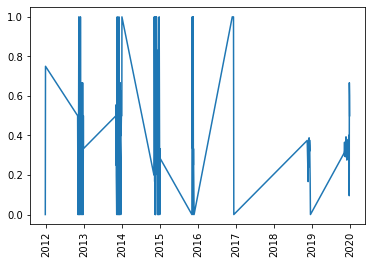

In [96]:
merged_df = merged_df.sort_values('date', ascending=True)
plt.plot(merged_df['date'], merged_df['party_probability'])
plt.xticks(rotation='vertical')
plt.show()

Above is a plot of the Nobember and December liquor consumption. The consumption is high in 2012 through 2017. It drops in 2018 and 2019 however. But most importantly, the sales increases back, suggesting profits in the following business fields:
    1. Alcohol production - **Diageo**
    2. Production of alcohol containers/glasses - **O-I Glass Inc**
    3. Restaurant businesses
            This will increase the sales in stores that sell items used in
            Restaurants **Home Depot Inc**